In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install numpy
# !pip install pandas

In [ ]:
!pwd
%cd /content/drive/MyDrive/Summer Research 2021/     # google drive folder my data (csv files) are stored

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/content/drive/My Drive/Summer Research 2021
/content/drive/MyDrive/Summer Research 2021


In [ ]:
# retrieve data from csv file stored in google drive
d = pd.read_csv('c_2k_TestingGaussian1.csv')
d

,Unnamed: 0,correct after perturbations %,audio name,normalized,origConf,avgPertConf,binMethod,numBins,binEdges,overlapping,sigma,mse,mse avg,r2,r2 avg,z_p,z_labs,weights,coefs
0,0,"[0.45377311344327836, 0.4877561219390305, 0.46...",audio/speech_commands/cat/9f869f70_nohash_0.wav,"[20000, 20000, 20000, 20000, 20000]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.4338, 0.4692, 0.451, 0.4482, 0.4717]","['EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN']","[25, 25, 25, 25, 25]","[[[0, 102], [102, 204], [204, 307], [307, 409]...","[False, False, False, False, False]","[0.7505544783102268, 0.7495841095523631, 0.761...","[0.0016462019726260163, 0.024152693656914734, ...",0.027044,"[0.543274245939455, 0.7346407184939692, 0.3308...",0.538404,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[[1.0, 0.9619140625, 0.0, 1.9073486328125e-06,...","[[1.0, 0.016869329515651597, 0.004987914916030...","[[0.0, 0.013164493693482921, 0.0, 0.0035610428..."
1,1,"[0.34782608695652173, 0.3548225887056472, 0.34...",audio/speech_commands/cat/f618568f_nohash_0.wav,"[20000, 20000, 20000, 20000, 20000]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.3376, 0.3445, 0.34, 0.3381, 0.3254]","['EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN']","[25, 25, 25, 25, 25]","[[[0, 102], [102, 204], [204, 307], [307, 409]...","[False, False, False, False, False]","[0.5783178242447278, 0.5760462840139453, 0.576...","[0.04897051224991882, 0.0084223148837824, 0.00...",0.014447,"[0.7914382671585792, 0.44546435577037546, 0.53...",0.454036,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[[1.0, 2.980232238769531e-07, 4.33325767517089...","[[1.0, 0.33464843389755, 0.44823495098315685, ...","[[0.0, 0.5678364139508756, 0.0, 0.0, 0.3024756..."
2,2,"[0.767616191904048, 0.7631184407796102, 0.7661...",audio/speech_commands/cat/e9a76b2f_nohash_0.wav,"[20000, 20000, 20000, 20000, 20000]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.7466, 0.7446, 0.748, 0.7505, 0.754]","['EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN']","[25, 25, 25, 25, 25]","[[[0, 102], [102, 204], [204, 307], [307, 409]...","[False, False, False, False, False]","[0.6291653011754429, 0.626407137688058, 0.6226...","[0.12142975770449746, 0.11583362312066298, 0.0...",0.065388,"[0.382765342458407, 0.4327656907437004, 0.4410...",0.460039,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[[1.0, 1.0, 1.0, 1.0, 0.9541015625, 1.0, 0.531...","[[1.0, 0.3857068539794917, 0.9954979633050902,...","[[-0.07605340648889741, -0.20657669529340983, ..."
3,3,"[0.3583208395802099, 0.35282358820589704, 0.36...",audio/speech_commands/cat/ba676390_nohash_0.wav,"[20000, 20000, 20000, 20000, 20000]","[0.9844, 0.9844, 0.9844, 0.9844, 0.9844]","[0.3416, 0.3381, 0.35, 0.3503, 0.3525]","['EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN']","[25, 25, 25, 25, 25]","[[[0, 102], [102, 204], [204, 307], [307, 409]...","[False, False, False, False, False]","[0.7285140027370055, 0.7229456183145302, 0.724...","[0.003917123600107615, 0.01036294715609444, 0....",0.017947,"[0.6956039750294762, 0.944480393933918, 0.6061...",0.735287,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[[0.984375, 3.5762786865234375e-07, 0.984375, ...","[[1.0, 0.005565661498757966, 0.977482990215953...","[[0.026227821424975203, 0.0, 0.0, 0.0018064374..."
4,4,"[0.5272363818090955, 0.5222388805597201, 0.509...",audio/speech_commands/cat/db7c95b0_nohash_0.wav,"[20000, 20000, 20000, 20000, 20000]","[0.969, 0.969, 0.969, 0.969, 0.969]","[0.4624, 0.46, 0.4436, 0.4497, 0.4434]","['EVEN', 'EVEN', 'EVEN', 'EVEN', 'EVEN']","[25, 25, 25, 25, 25]","[[[0, 102], [102, 204], [204, 307], [307, 409]...","[False, False, False, False, False]","[0.29072963027751214, 0.292082096270318, 0.293...","[0.018124899176381902, 0.0008567245139613384, ...",0.015164,"[0.7289967113352749, 0.5750098571895794, 0.739...",0.660170,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[[0.96923828125, 0.65576171875, 0.0, 0.9106445...","[[1.0, 0.7022060746848781, 0.41490158409035394...","[[0.0, 0.2794298460818739, 0.15917748840111556..."


In [ ]:
index = 0
coefs = []
for i in range(len(d['coefs'])):
    string = d['coefs'][i].replace("\n", '')
    coefs.append(eval(string))
coefs = np.array(coefs)
# coefs = np.array(coefs[index])

In [ ]:
mse = []
for i in range(len(d['mse'])):
    mse.append(eval(d['mse'][i]))

r2 = []
for i in range(len(d['r2'])):
    r2.append(eval(d['r2'][i]))

avgR2 = []
for i in range(len(d['r2 avg'])):
    avgR2.append(round(d['r2 avg'][i], 3))

avgMse = []
for i in range(len(d['mse avg'])):
    avgMse.append(round(d['mse avg'][i], 3))

print(avgR2)
print(avgMse)

# mse = np.array(eval(d['mse']))
# mse = np.array(eval(d['mse'][index]))
# mse

# r2 = np.array(eval(d['r2'][index]))
# r2

[0.538, 0.454, 0.46, 0.735, 0.66]
[0.027, 0.014, 0.065, 0.018, 0.015]


In [ ]:
norm = []
for i in range(len(d['normalized'])):
    norm.append(eval(d['normalized'][i]))

name = []
for i in range(len(d['audio name'])):
    name.append(d['audio name'][i][26:])

origConf = []
for i in range(len(d['origConf'])):
    origConf.append(eval(d['origConf'][i]))

avgPertConf = []
for i in range(len(d['avgPertConf'])):
    avgPertConf.append(eval(d['avgPertConf'][i]))

correctAftPert = []
for i in range(len(d['correct after perturbations %'])):
    correctAftPert.append(eval(d['correct after perturbations %'][i]))

binMeth = []
for i in range(len(d['binMethod'])):
    binMeth.append(eval(d['binMethod'][i]))

numBins = []
for i in range(len(d['numBins'])):
    numBins.append(eval(d['numBins'][i]))

# binEdges = eval(d['binEdges'][0])[0]
# # binEdges = eval(d['binEdges'][0])

binEdges = []
for i in range(len(d['binEdges'])):
    binEdges.append(eval(d['binEdges'][i]))

overlapping = []
for i in range(len(d['overlapping'])):
    overlapping.append(eval(d['overlapping'][i]))

sigma = []
for i in range(len(d['sigma'])):
    sigma.append(eval(d['sigma'][i]))

xAxis = []
for i in range(len(binEdges)):
    partX1 = []
    for j in range(len(binEdges[i])):
        partX2 = []
        for h in range(len(binEdges[i][j])):
            partX2.append((binEdges[i][j][h][0] + binEdges[i][j][h][1])/2)
        partX1.append(partX2)
    xAxis.append(partX1) 


# print(Normalization)
# print(name)
# print(origConf)
# print(avgPertConf)
# print(correctAftPert)
# print(binEdges)
# print(len(xAxis))
# print(xAxis)
# print(numBins)
# print(sigma)

In [ ]:
print(len(binEdges))
print(len(binEdges[0]))
print(len(binEdges[0][0]))
print(len(binEdges[0][0][0]))
print(len(xAxis))
print(len(xAxis[0]))
print(len(xAxis[0][0]))
print(len(coefs))
print(len(coefs[0]))
print(len(coefs[0][0]))


5
5
25
2
5
5
25
5
5
25


In [ ]:
# np.var(coefs, axis=0)

In [ ]:
# np.sum(coefs[0])

In [ ]:
d['coefs']

0    [[0.0, 0.013164493693482921, 0.0, 0.0035610428...
1    [[0.0, 0.5678364139508756, 0.0, 0.0, 0.3024756...
2    [[-0.07605340648889741, -0.20657669529340983, ...
3    [[0.026227821424975203, 0.0, 0.0, 0.0018064374...
4    [[0.0, 0.2794298460818739, 0.15917748840111556...
Name: coefs, dtype: object

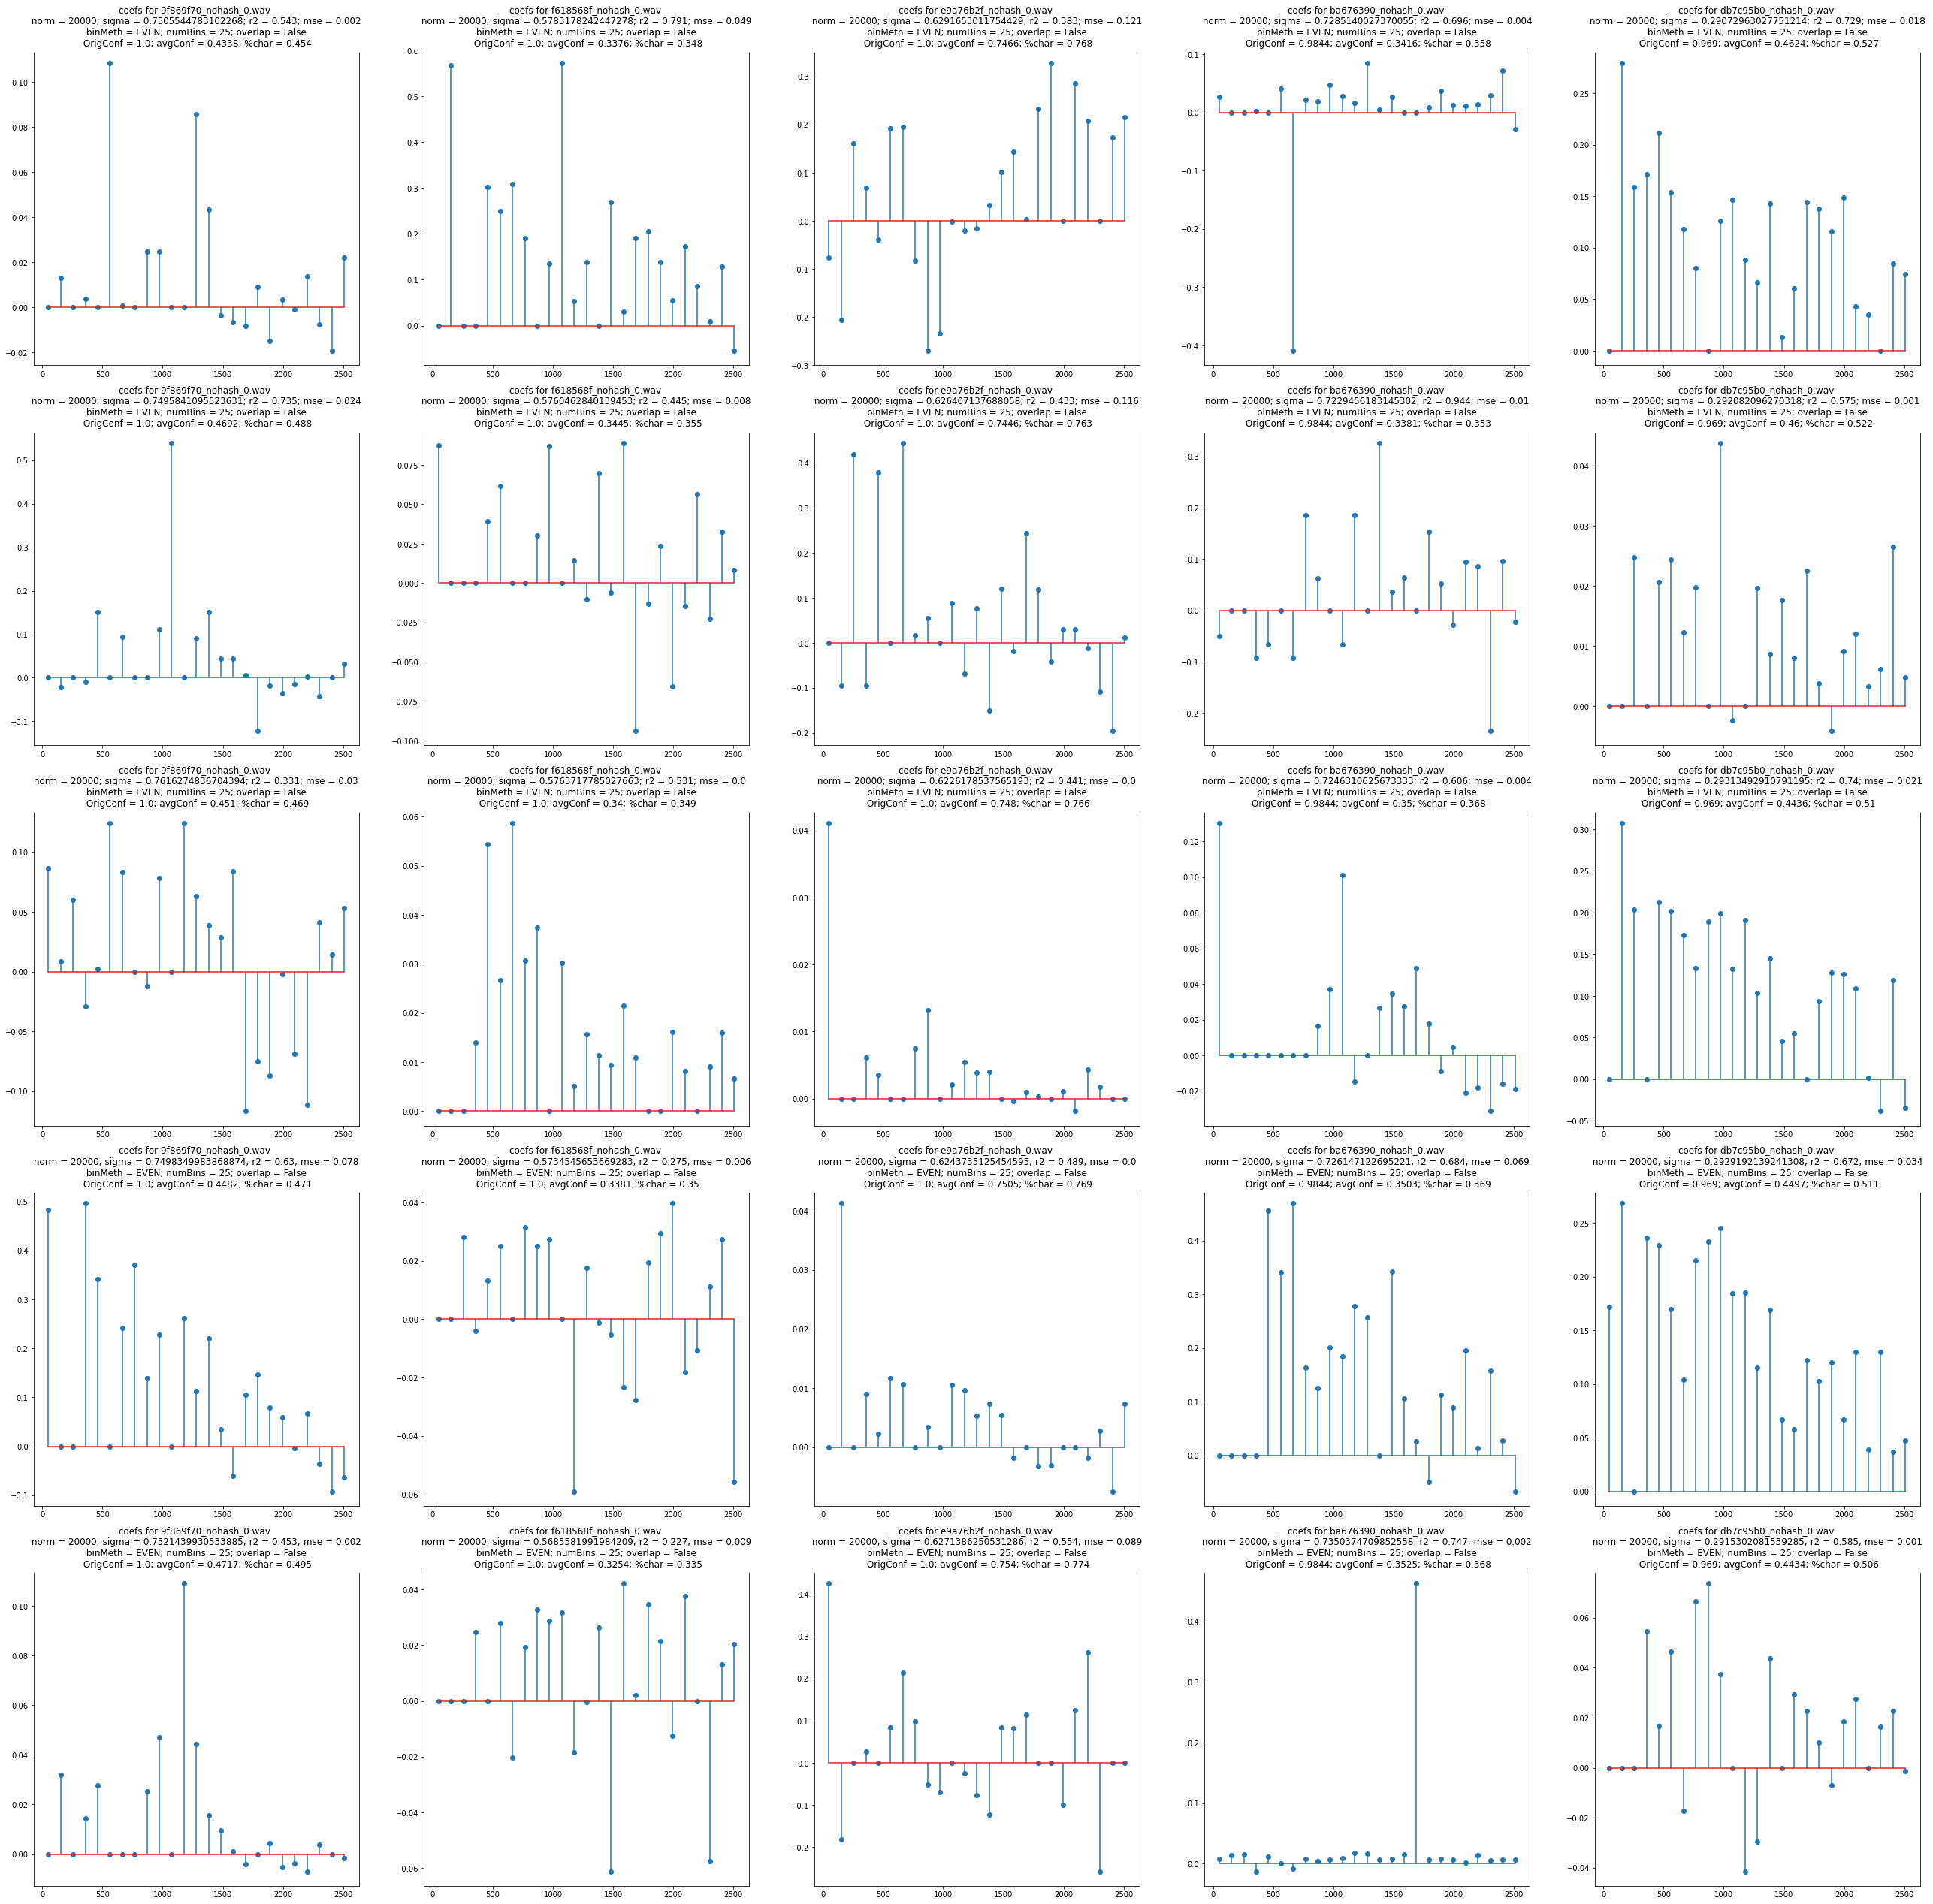

In [ ]:
# plot coefficients for models
fig = plt.figure(figsize=(len(coefs)*9, len(coefs[0])*9))
# fig.tight_layout(pad=20.0)
fig.patch.set_facecolor('xkcd:white')


# bins = []
# for i in range(len(coefs)):
#     bins.append([frequencies[i][j][0] for j in range(len(frequencies[i]))] + [frequencies[i][-1][1]])
arr = [[i for i in range(len(coefs[j][0]))] for j in range(len(coefs))]
# print(arr)
for j in range(1, len(coefs)+1):
    for i in range(1, len(coefs[j-1])+1):
        plt.subplot(len(coefs[j-1]),len(coefs), 5*(i-1)+j)
        # plt.title(f'coefs at {i}th model; r2 = {round(r2[j-1][i-1], 3)}; mse = {round(mse[j-1][i-1], 3)}', backgroundcolor= 'white')
        plt.title(f'coefs for {name[j-1]} \n norm = {norm[j-1][i-1]}; sigma = {sigma[j-1][i-1]}; r2 = {round(r2[j-1][i-1], 3)}; mse = {round(mse[j-1][i-1], 3)} \n binMeth = {binMeth[j-1][i-1]}; numBins = {numBins[j-1][i-1]}; overlap = {overlapping[j-1][i-1]} \n OrigConf = {origConf[j-1][i-1]}; avgConf = {avgPertConf[j-1][i-1]}; %char = {round(correctAftPert[j-1][i-1], 3)}', pad=0, backgroundcolor='white')
        # plt.title()
        # plt.hist(coefs[i-1], bins = coefs[i-1], weights = coefs[i-1], color='#0504aa')
        plt.stem(xAxis[j-1][i-1], coefs[j-1][i-1], use_line_collection=True)

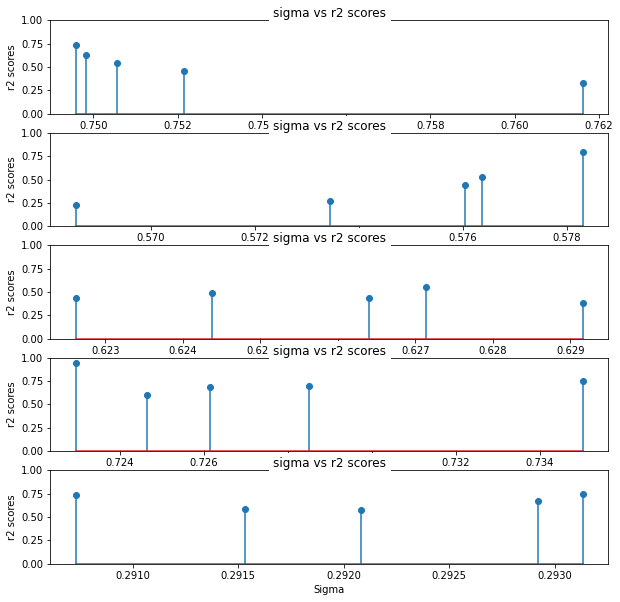

In [ ]:
# plot sigma vs r2

fig2 = plt.figure(figsize=(10, 10))
# fig.tight_layout(pad=20.0)
fig2.patch.set_facecolor('xkcd:white')


# arr = [[i for i in range(len(coefs[j][0]))] for j in range(len(coefs))]
# print(arr)

for j in range(len(sigma)):
    plt.subplot(5, 1, j+1)
    plt.title('sigma vs r2 scores', pad=0, backgroundcolor='white')
    plt.xlabel("Sigma")
    plt.ylabel("r2 scores")
    plt.ylim([0, 1])
    plt.stem(sigma[j], r2[j], use_line_collection=True)

# for j in range(1, len(coefs)+1):
#     for i in range(1, len(coefs[j-1])+1):
#         plt.subplot(len(coefs[j-1]),len(coefs), 5*(i-1)+j)
#         # plt.title(f'coefs at {i}th model; r2 = {round(r2[j-1][i-1], 3)}; mse = {round(mse[j-1][i-1], 3)}', backgroundcolor= 'white')
#         plt.title(f'coefs for {name[j-1]} \n norm = {norm[j-1][i-1]}; sigma = {sigma[j-1][i-1]}; r2 = {round(r2[j-1][i-1], 3)}; mse = {round(mse[j-1][i-1], 3)} \n binMeth = {binMeth[j-1][i-1]}; numBins = {numBins[j-1][i-1]}; overlap = {overlapping[j-1][i-1]} \n OrigConf = {origConf[j-1][i-1]}; avgConf = {avgPertConf[j-1][i-1]}; %char = {round(correctAftPert[j-1][i-1], 3)}', pad=0, backgroundcolor='white')
#         # plt.title()
#         # plt.hist(coefs[i-1], bins = coefs[i-1], weights = coefs[i-1], color='#0504aa')
#         plt.stem(xAxis[j-1][i-1], coefs[j-1][i-1], use_line_collection=True)



In [ ]:
print(len(sigma))
print(len(sigma[0]))
print(sigma[0][0])
print(r2[0])

5
5
0.7505544783102268
[0.543274245939455, 0.7346407184939692, 0.3308331718367956, 0.6302238210280301, 0.453046762304284]
